In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

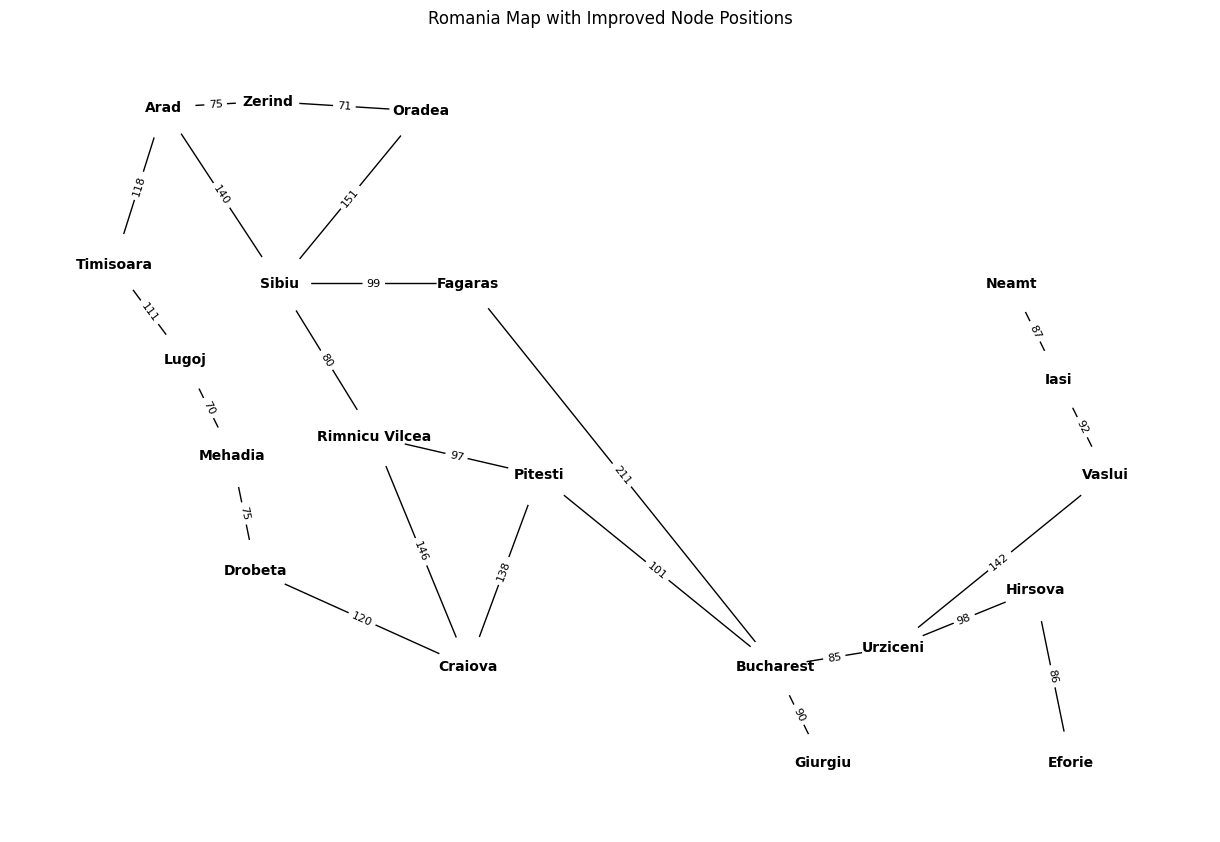

In [ ]:


# Sample Romania map data with custom node positions
romania_map = {
    'graph_dict': {
        'Arad': {'Zerind': 75, 'Timisoara': 118, 'Sibiu': 140},
        'Zerind': {'Arad': 75, 'Oradea': 71},
        'Oradea': {'Zerind': 71, 'Sibiu': 151},
        'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
        'Timisoara': {'Arad': 118, 'Lugoj': 111},
        'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
        'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
        'Drobeta': {'Mehadia': 75, 'Craiova': 120},
        'Craiova': {'Drobeta': 120, 'Pitesti': 138, 'Rimnicu Vilcea': 146},
        'Rimnicu Vilcea': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
        'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
        'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucharest': 101},
        'Bucharest': {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},
        'Giurgiu': {'Bucharest': 90},
        'Urziceni': {'Bucharest': 85, 'Hirsova': 98, 'Vaslui': 142},
        'Hirsova': {'Urziceni': 98, 'Eforie': 86},
        'Eforie': {'Hirsova': 86},
        'Vaslui': {'Urziceni': 142, 'Iasi': 92},
        'Iasi': {'Vaslui': 92, 'Neamt': 87},
        'Neamt': {'Iasi': 87}
    },
    'locations': {
        'Arad': (91, 492), 'Zerind': (135, 495), 'Oradea': (200, 490), 'Sibiu': (140, 400),
        'Timisoara': (70, 410), 'Lugoj': (100, 360), 'Mehadia': (120, 310), 'Drobeta': (130, 250),
        'Craiova': (220, 200), 'Rimnicu Vilcea': (180, 320), 'Fagaras': (220, 400),
        'Pitesti': (250, 300), 'Bucharest': (350, 200), 'Giurgiu': (370, 150), 'Urziceni': (400, 210),
        'Hirsova': (460, 240), 'Eforie': (475, 150), 'Vaslui': (490, 300), 'Iasi': (470, 350),
        'Neamt': (450, 400)
    }
}




In [ ]:
node_colors = {node: 'white' for node in romania_map['locations'].keys()}
node_positions = romania_map['locations']
node_label_positions = {k: [v[0], v[1] - 10] for k, v in romania_map['locations'].items()}
edge_weights = {(k, k2): v2 for k, v in romania_map['graph_dict'].items() for k2, v2 in v.items()}

romania_graph_data = {
    'graph_dict': romania_map['graph_dict'],
    'node_colors': node_colors,
    'node_positions': node_positions,
    'node_label_positions': node_label_positions,
    'edge_weights': edge_weights
}

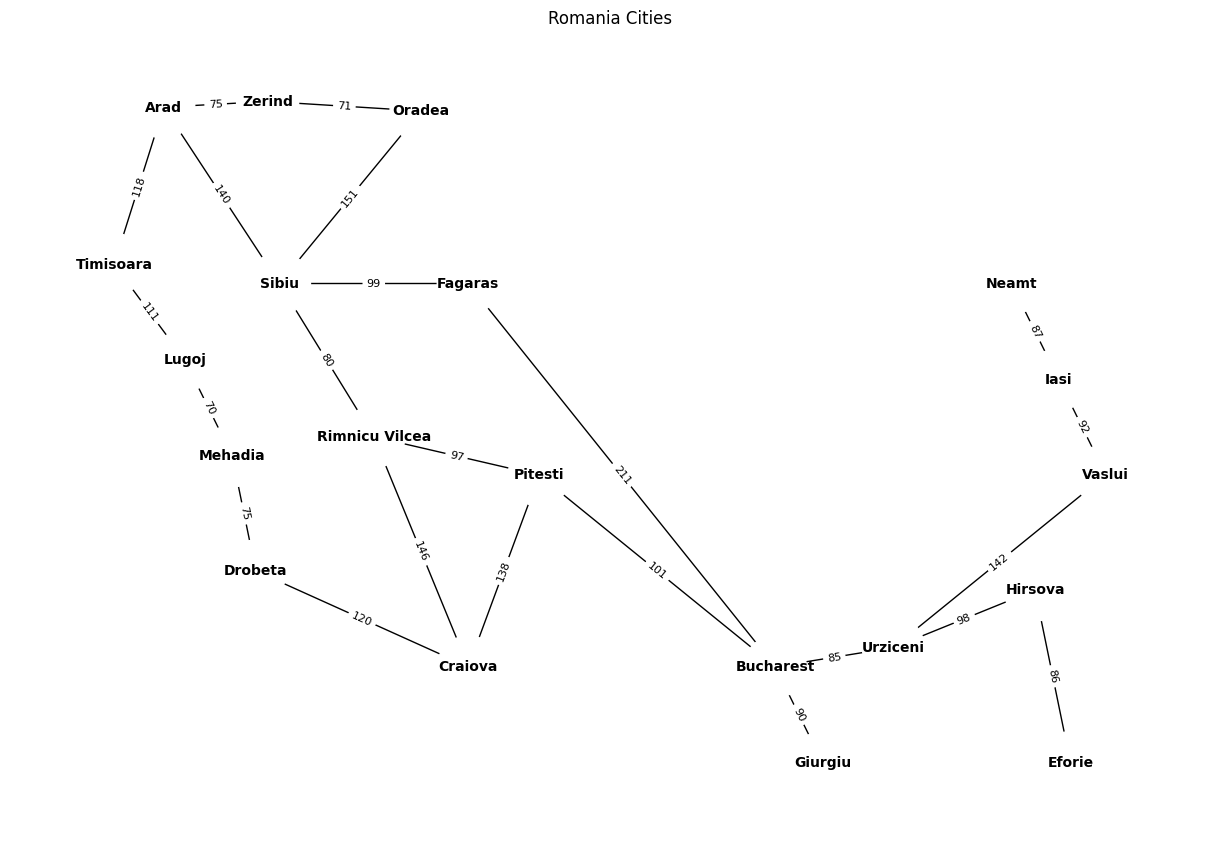

In [ ]:
# Create the graph
graph = nx.Graph()
for node, neighbors in romania_graph_data['graph_dict'].items():
    for neighbor, weight in neighbors.items():
        graph.add_edge(node, neighbor, weight=weight)

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(graph,
        pos=romania_graph_data['node_positions'],
        with_labels=True,
        node_size=2000,
        node_color=list(romania_graph_data['node_colors'].values()),
        font_size=10,
        font_weight='bold',
        edge_color='black')

# Add edge labels for weights
nx.draw_networkx_edge_labels(
    graph,
    pos=romania_graph_data['node_positions'],
    edge_labels=romania_graph_data['edge_weights'],
    font_size=8
)

plt.title("Romania Cities")
plt.show()
